In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from tqdm import tqdm
import pixellib
from pixellib.semantic import semantic_segmentation
import pandas as pd
%matplotlib inline
%load_ext blackcellmagic

In [11]:
PATH_TO_VIDEO = "data/tank-top.mp4"
cap = cv2.VideoCapture(PATH_TO_VIDEO)
if not cap.isOpened():
    print("Cannot open camera")
    assert False
    
frames = []
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frames.append(frame)

Can't receive frame (stream end?). Exiting ...


Read the data.

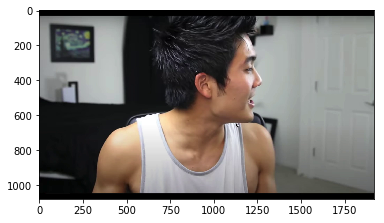

In [13]:
plt.imshow(cv2.cvtColor(frames[3], cv2.COLOR_BGR2RGB))
plt.show()

Show a frame.

In [15]:
segment_image = semantic_segmentation()
segment_image.load_ade20k_model("deeplabv3_xception65_ade20k.h5")

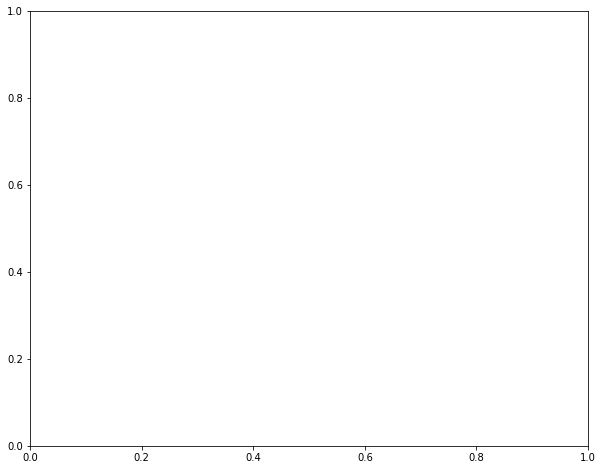

In [43]:
CONFIG = {
    "person": {
        "label": 13,
        "xbounds": (0.5, 1),
        "ybounds": (0.1, 0.9),
        "linestyle": "--",
    },
    "truck": {"label": 84, "xbounds": (0.1, 0.9), "ybounds": (0, 0.9)},
    "painting": {"label": 23, "xbounds": (0, 1), "ybounds": (0, 1), "linestyle": "-"},
}


def bounding_box(mask, xbounds=(0, 1), ybounds=(0, 1)):
    xs, ys = np.where(mask)
    xs = sorted(xs)
    ys = sorted(ys)
    n = len(xs)
    xmin = xs[int(xbounds[0] * n)]
    xmax = xs[int(xbounds[1] * n) - 1]

    ymin = ys[int(ybounds[0] * n)]
    ymax = ys[int(ybounds[1] * n) - 1]

    return xmin, xmax, ymin, ymax


def _translate_dims(x, y, in_shape, out_shape):
    return int(x * out_shape[0] / in_shape[0]), int(y * out_shape[1] / in_shape[1])


fig, ax = plt.subplots(1, figsize=(10, 8))


def get_ad_space(path_to_img, objs):

    plt.clf()
    ax = plt.gca()
    img = cv2.imread(path_to_img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    for obj in objs:
        conf = CONFIG[obj]
        output, segmap = segment_image.segmentAsAde20k(path_to_img, "output.png")
        xmin, xmax, ymin, ymax = bounding_box(
            output == conf["label"], xbounds=conf["xbounds"], ybounds=conf["ybounds"]
        )

        x, y = _translate_dims(xmin, ymin, output.shape, img.shape)
        w, h = _translate_dims(xmax - xmin, ymax - ymin, output.shape, img.shape)
        ax.add_patch(
            patches.Rectangle(
                (y, x),
                h,
                w,
                linewidth=2,
                edgecolor="r",
                facecolor="none",
                linestyle=conf["linestyle"],
            )
        )
    plt.savefig(path_to_img.replace("tmp", "out"))


  0%|          | 0/100 [00:00<?, ?it/s]

Processed Image saved successfuly in your current working directory.



  1%|          | 1/100 [00:05<09:07,  5.53s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  2%|▏         | 2/100 [00:10<08:48,  5.40s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  3%|▎         | 3/100 [00:15<08:34,  5.30s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  4%|▍         | 4/100 [00:20<08:23,  5.25s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  5%|▌         | 5/100 [00:25<08:15,  5.21s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  6%|▌         | 6/100 [00:31<08:08,  5.19s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  7%|▋         | 7/100 [00:36<08:03,  5.20s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  8%|▊         | 8/100 [00:41<07:58,  5.20s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



  9%|▉         | 9/100 [00:46<07:53,  5.20s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 10%|█         | 10/100 [00:51<07:49,  5.22s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 11%|█         | 11/100 [00:57<07:44,  5.22s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 12%|█▏        | 12/100 [01:02<07:41,  5.24s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 13%|█▎        | 13/100 [01:07<07:36,  5.25s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 14%|█▍        | 14/100 [01:13<07:32,  5.27s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 15%|█▌        | 15/100 [01:18<07:26,  5.25s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 16%|█▌        | 16/100 [01:23<07:23,  5.29s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 17%|█▋        | 17/100 [01:28<07:19,  5.30s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 18%|█▊        | 18/100 [01:34<07:19,  5.36s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 19%|█▉        | 19/100 [01:40<07:22,  5.46s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 20%|██        | 20/100 [01:45<07:24,  5.56s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 21%|██        | 21/100 [01:51<07:23,  5.61s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 22%|██▏       | 22/100 [01:57<07:14,  5.57s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 23%|██▎       | 23/100 [02:02<07:09,  5.58s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 24%|██▍       | 24/100 [02:08<07:06,  5.62s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 25%|██▌       | 25/100 [02:14<07:00,  5.61s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 26%|██▌       | 26/100 [02:19<06:55,  5.62s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 27%|██▋       | 27/100 [02:25<06:48,  5.59s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 28%|██▊       | 28/100 [02:30<06:38,  5.54s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 29%|██▉       | 29/100 [02:36<06:36,  5.58s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 30%|███       | 30/100 [02:42<06:33,  5.63s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 31%|███       | 31/100 [02:47<06:25,  5.59s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 32%|███▏      | 32/100 [02:53<06:17,  5.56s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 33%|███▎      | 33/100 [02:58<06:09,  5.52s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 34%|███▍      | 34/100 [03:04<06:04,  5.53s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 35%|███▌      | 35/100 [03:09<05:59,  5.54s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 36%|███▌      | 36/100 [03:15<05:58,  5.59s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 37%|███▋      | 37/100 [03:20<05:51,  5.58s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 38%|███▊      | 38/100 [03:26<05:45,  5.56s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 39%|███▉      | 39/100 [03:31<05:37,  5.53s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 40%|████      | 40/100 [03:37<05:30,  5.51s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 41%|████      | 41/100 [03:42<05:24,  5.50s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 42%|████▏     | 42/100 [03:48<05:17,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 43%|████▎     | 43/100 [03:53<05:12,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 44%|████▍     | 44/100 [03:59<05:07,  5.50s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 45%|████▌     | 45/100 [04:04<05:01,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 46%|████▌     | 46/100 [04:10<04:56,  5.49s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 47%|████▋     | 47/100 [04:15<04:50,  5.49s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 48%|████▊     | 48/100 [04:21<04:46,  5.52s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 49%|████▉     | 49/100 [04:26<04:42,  5.54s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 50%|█████     | 50/100 [04:32<04:35,  5.50s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 51%|█████     | 51/100 [04:37<04:29,  5.49s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 52%|█████▏    | 52/100 [04:43<04:23,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 53%|█████▎    | 53/100 [04:48<04:18,  5.50s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 54%|█████▍    | 54/100 [04:54<04:11,  5.47s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 55%|█████▌    | 55/100 [04:59<04:05,  5.45s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 56%|█████▌    | 56/100 [05:05<04:03,  5.52s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 57%|█████▋    | 57/100 [05:10<03:57,  5.53s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 58%|█████▊    | 58/100 [05:16<03:52,  5.55s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 59%|█████▉    | 59/100 [05:21<03:47,  5.54s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 60%|██████    | 60/100 [05:27<03:40,  5.50s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 61%|██████    | 61/100 [05:32<03:32,  5.45s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 62%|██████▏   | 62/100 [05:37<03:25,  5.40s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 63%|██████▎   | 63/100 [05:43<03:19,  5.39s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 64%|██████▍   | 64/100 [05:48<03:14,  5.39s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 65%|██████▌   | 65/100 [05:54<03:08,  5.39s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 66%|██████▌   | 66/100 [05:59<03:04,  5.43s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 67%|██████▋   | 67/100 [06:05<03:00,  5.45s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 68%|██████▊   | 68/100 [06:10<02:55,  5.49s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 69%|██████▉   | 69/100 [06:16<02:49,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 70%|███████   | 70/100 [06:21<02:44,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 71%|███████   | 71/100 [06:27<02:39,  5.49s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 72%|███████▏  | 72/100 [06:32<02:34,  5.53s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 73%|███████▎  | 73/100 [06:38<02:29,  5.54s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 74%|███████▍  | 74/100 [06:43<02:23,  5.53s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 75%|███████▌  | 75/100 [06:49<02:17,  5.51s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 76%|███████▌  | 76/100 [06:54<02:11,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 77%|███████▋  | 77/100 [06:59<02:04,  5.40s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 78%|███████▊  | 78/100 [07:05<01:59,  5.41s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 79%|███████▉  | 79/100 [07:10<01:53,  5.39s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 80%|████████  | 80/100 [07:15<01:47,  5.37s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 81%|████████  | 81/100 [07:21<01:42,  5.42s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 82%|████████▏ | 82/100 [07:26<01:37,  5.40s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 83%|████████▎ | 83/100 [07:32<01:31,  5.36s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 84%|████████▍ | 84/100 [07:37<01:25,  5.36s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 85%|████████▌ | 85/100 [07:42<01:20,  5.37s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 86%|████████▌ | 86/100 [07:48<01:15,  5.40s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 87%|████████▋ | 87/100 [07:53<01:10,  5.44s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 88%|████████▊ | 88/100 [07:59<01:05,  5.45s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 89%|████████▉ | 89/100 [08:04<01:00,  5.48s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 90%|█████████ | 90/100 [08:10<00:54,  5.43s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 91%|█████████ | 91/100 [08:15<00:48,  5.39s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 92%|█████████▏| 92/100 [08:20<00:42,  5.33s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 93%|█████████▎| 93/100 [08:26<00:37,  5.32s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 94%|█████████▍| 94/100 [08:31<00:31,  5.33s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 95%|█████████▌| 95/100 [08:36<00:26,  5.34s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 96%|█████████▌| 96/100 [08:42<00:21,  5.38s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 97%|█████████▋| 97/100 [08:47<00:16,  5.39s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 98%|█████████▊| 98/100 [08:52<00:10,  5.38s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



 99%|█████████▉| 99/100 [08:58<00:05,  5.42s/it]

Processed Image saved successfuly in your current working directory.
Processed Image saved successfuly in your current working directory.



100%|██████████| 100/100 [09:03<00:00,  5.44s/it]

Processed Image saved successfuly in your current working directory.


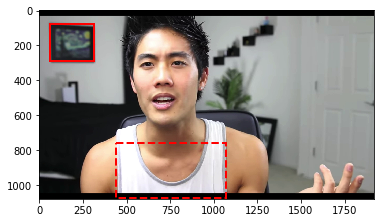

In [45]:
for i in tqdm(range(0, len(frames), 5)):
    path_to_img = f"tmp/{i:0=3d}.png"
    cv2.imwrite(path_to_img, frames[i])
    get_ad_space(path_to_img, ["person", "painting"])

In [21]:
img = cv2.imread(path_to_img)
output, segmap = segment_image.segmentAsAde20k(path_to_img, "output.png")

Processed Image saved successfuly in your current working directory.


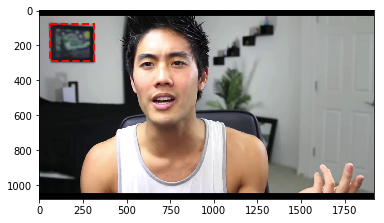

In [36]:
xbounds = (0, 1)
ybounds = (0, 1)
mask = output == 23
xs, ys = np.where(mask)
xs = sorted(xs)
ys = sorted(ys)
n = len(xs)
xmin = xs[int(xbounds[0] * n)]
xmax = xs[int(xbounds[1] * n) - 1]

ymin = ys[int(ybounds[0] * n)]
ymax = ys[int(ybounds[1] * n) - 1]

x, y = _translate_dims(xmin, ymin, output.shape, img.shape)
w, h = _translate_dims(xmax - xmin, ymax - ymin, output.shape, img.shape)
plt.clf()
ax = plt.gca()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.add_patch(
    patches.Rectangle((y, x), h, w, linewidth=2, edgecolor="r", facecolor="none", linestyle="--")
)
plt.show()

In [29]:
np.unique(output)

array([ 1,  4,  6, 13, 15, 20, 23, 32])

In [53]:
np.linalg.norm(np.std(img[xmin:xmax, ymin:ymax], axis=(0, 1)))

42.01047662502733

In [54]:
np.linalg.norm(np.std(img, axis=(0, 1)))

105.64146621630545